In [81]:
import pandas as pd

data_source = 'ProjectDataMining.csv'

df = pd.read_csv(data_source, delimiter= ";")

df

,Apotek,Jan,Feb,Mar,Grand Total
0,1,NaN,NaN,19000.0,19000
1,2,15000.0,NaN,NaN,15000
2,3,114000.0,NaN,NaN,114000
3,4,NaN,NaN,68000.0,68000
4,5,NaN,19000.0,NaN,19000
...,...,...,...,...,...
175,176,NaN,NaN,26000.0,26000
176,177,NaN,NaN,38000.0,38000
177,178,NaN,26000.0,NaN,26000
178,179,NaN,NaN,26000.0,26000


In [82]:
df.isna().sum()

Apotek          0
Jan            97
Feb            76
Mar            69
Grand Total     0
dtype: int64

In [83]:
df_x = df.drop("Grand Total", axis = 1)

df_y = df["Grand Total"]

print('fitur x')
print(df_x)

print('fitur y / target')
print(df_y)

new_df01 = df.fillna(0)

new_df01


fitur x
     Apotek       Jan      Feb      Mar
0         1       NaN      NaN  19000.0
1         2   15000.0      NaN      NaN
2         3  114000.0      NaN      NaN
3         4       NaN      NaN  68000.0
4         5       NaN  19000.0      NaN
..      ...       ...      ...      ...
175     176       NaN      NaN  26000.0
176     177       NaN      NaN  38000.0
177     178       NaN  26000.0      NaN
178     179       NaN      NaN  26000.0
179     180       NaN      NaN  50000.0

[180 rows x 4 columns]
fitur y / target
0       19000
1       15000
2      114000
3       68000
4       19000
        ...  
175     26000
176     38000
177     26000
178     26000
179     50000
Name: Grand Total, Length: 180, dtype: int64


,Apotek,Jan,Feb,Mar,Grand Total
0,1,0.0,0.0,19000.0,19000
1,2,15000.0,0.0,0.0,15000
2,3,114000.0,0.0,0.0,114000
3,4,0.0,0.0,68000.0,68000
4,5,0.0,19000.0,0.0,19000
...,...,...,...,...,...
175,176,0.0,0.0,26000.0,26000
176,177,0.0,0.0,38000.0,38000
177,178,0.0,26000.0,0.0,26000
178,179,0.0,0.0,26000.0,26000


In [84]:
new_df01.isna().sum()

Apotek         0
Jan            0
Feb            0
Mar            0
Grand Total    0
dtype: int64

In [85]:
new_df01["Grand Total"].value_counts()

Grand Total
15000      21
26000      17
19000       9
30000       8
38000       6
           ..
755000      1
357000      1
1255000     1
1347000     1
87000       1
Name: count, Length: 99, dtype: int64

In [86]:
'''from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.preprocessing import LabelBinarizer

smote = SMOTE(k_neighbors=1)

x_smote, y_smote = smote.fit_resample(new_df01,df_y)

print(x_smote)
print(y_smote)'''

'from imblearn.over_sampling import SMOTE, RandomOverSampler\n\nfrom sklearn.preprocessing import LabelBinarizer\n\nsmote = SMOTE(k_neighbors=1)\n\nx_smote, y_smote = smote.fit_resample(new_df01,df_y)\n\nprint(x_smote)\nprint(y_smote)'

In [87]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform oversampling
x_ros, y_ros = ros.fit_resample(new_df01, df_y)

print (x_ros)
print (y_ros)


      Apotek        Jan       Feb        Mar  Grand Total
0          1        0.0       0.0    19000.0        19000
1          2    15000.0       0.0        0.0        15000
2          3   114000.0       0.0        0.0       114000
3          4        0.0       0.0    68000.0        68000
4          5        0.0   19000.0        0.0        19000
...      ...        ...       ...        ...          ...
2074      75  1105000.0  875000.0  1505000.0      3485000
2075      75  1105000.0  875000.0  1505000.0      3485000
2076      75  1105000.0  875000.0  1505000.0      3485000
2077      75  1105000.0  875000.0  1505000.0      3485000
2078      75  1105000.0  875000.0  1505000.0      3485000

[2079 rows x 5 columns]
0         19000
1         15000
2        114000
3         68000
4         19000
         ...   
2074    3485000
2075    3485000
2076    3485000
2077    3485000
2078    3485000
Name: Grand Total, Length: 2079, dtype: int64


(832,)
  Classifier                                         prediction  accuracy
0         NB                                    MultinomialNB()  0.776442
1       K-NN                KNeighborsClassifier(n_neighbors=1)  0.998798
2         RF  (DecisionTreeClassifier(max_depth=3, max_featu...  0.330529
3         DT                           DecisionTreeClassifier()  1.000000
4        MLP                         MLPClassifier(max_iter=90)  0.287260
5        SVM  SVC(decision_function_shape='ovo', kernel='lin...  0.998798


C:\Users\FITYAN\AppData\Local\Temp\ipykernel_11184\71864985.py:62: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Classifier', y='accuracy', data=cv_df,


accuracy
0.287260    0.287260
0.330529    0.330529
0.776442    0.776442
0.998798    0.998798
1.000000    1.000000
Name: accuracy, dtype: float64


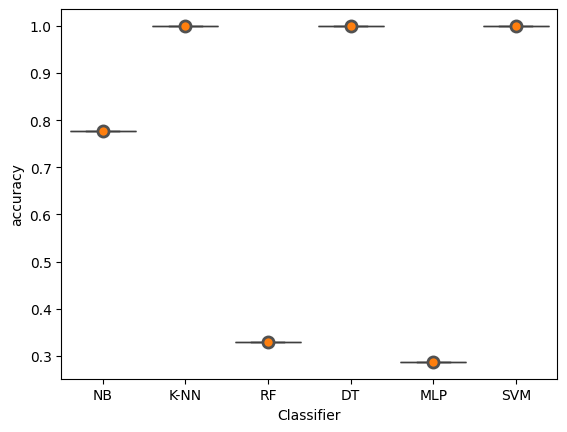

In [89]:
from sklearn.tree import DecisionTreeClassifier


import pandas as pd
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

x_ros.shape
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.4, random_state = 1)

NaiveBayes = MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
Knn       = KNeighborsClassifier(n_neighbors = 1).fit(X_train,np.ravel(y_train,order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(X_train,np.ravel(y_train,order='C'))
DTree =    DecisionTreeClassifier().fit(X_train,np.ravel(y_train,order='C'))
MultiLP =   MLPClassifier(max_iter= 90).fit(X_train,np.ravel(y_train,order='C'))
SuppVM =  SVC(gamma='scale', decision_function_shape='ovo', kernel = 'linear').fit(X_train,np.ravel(y_train,order='C'))

models = [
    NaiveBayes,
    Knn,      
    RandomForest, 
    DTree, 
    MultiLP, 
    SuppVM, 
] 
dlist = [
    'NB',
    'K-NN',
    'RF', 
    'DT', 
    'MLP', 
    'SVM', 
]

i = 0
print(y_test.shape)
entries = []
for model in models:
  prediction = model.predict(X_test)
  accuracies = accuracy_score(y_test, prediction)
  nameS = dlist[i]
  entries.append((nameS, model, accuracies))
  i = i + 1

cv_df = pd.DataFrame(entries, columns=['Classifier','prediction','accuracy'])
cv_df.to_csv('akurasi.csv')
print(cv_df)


sns.boxplot(x='Classifier', y='accuracy', data=cv_df)
sns.stripplot(x='Classifier', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

print(cv_df.groupby('accuracy').accuracy.mean())
plt.show()